# Comparing gene variance distributions for different scseq data sets
P Burt

data sets:
- Xin et al 2018 - CD4+ T cells, Cl13 infection analysis d13 pI, IL10 sorted
- Magen et al 2019 - CD4+ T cells, Arm infection, analysis d7 pI
- Ciucci et al 2019 - CD4+ T cells, Arm infection, analysis d7 pI

methods:
- scanpy default normalization
- hafemeister/satija (seurat authors) new norm. methods (neg. binomial distr.)

In [28]:
import scanpy as sc #for scanpy >= 1.3.7
import anndata as ann
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white')

import seaborn as sns

scanpy==1.5.1 anndata==0.7.3 umap==0.4.4 numpy==1.18.1 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.1 statsmodels==0.11.1 python-igraph==0.8.2 leidenalg==0.8.0


In [29]:
#path = "/home/burt/Documents/projects/2020/tcell_scRNAseq/output/"
path = "C:/Users/Philipp/OneDrive/projects/2020/tcell_scRNAseq/output/"
df_xin = pd.read_csv(path+"variance_xin_2018.csv")
df_xin_s = pd.read_csv(path+ "variance_xin_2018_seurat.csv")

df_ciucci = pd.read_csv(path+"variance_ciucci_2019.csv")
df_ciucci_s = pd.read_csv(path+"variance_ciucci_2019_seurat.csv")

df_magen = pd.read_csv(path+"variance_magen_2019.csv")
df_magen_s = pd.read_csv(path+"variance_magen_2019_seurat.csv")

studies = ["xin2018", "ciucci2019", "magen2019"]
df_sc = [df_xin, df_ciucci, df_magen]
df_seu = [df_xin_s, df_ciucci_s, df_magen_s]

for df, study in zip(df_sc, studies):
    df["study"] = study
    df["norm."] = "scanpy"

for df, study in zip(df_seu, studies):
    df["study"] = study
    df["norm."] = "sctransform"

    
df = pd.concat(df_sc)
df_seu = pd.concat(df_seu)

# normalized gene variance distribution using scanpy normalization

<ipython-input-30-5a5792754734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["dispersion_log"] = np.log2(df2.dispersions_norm)


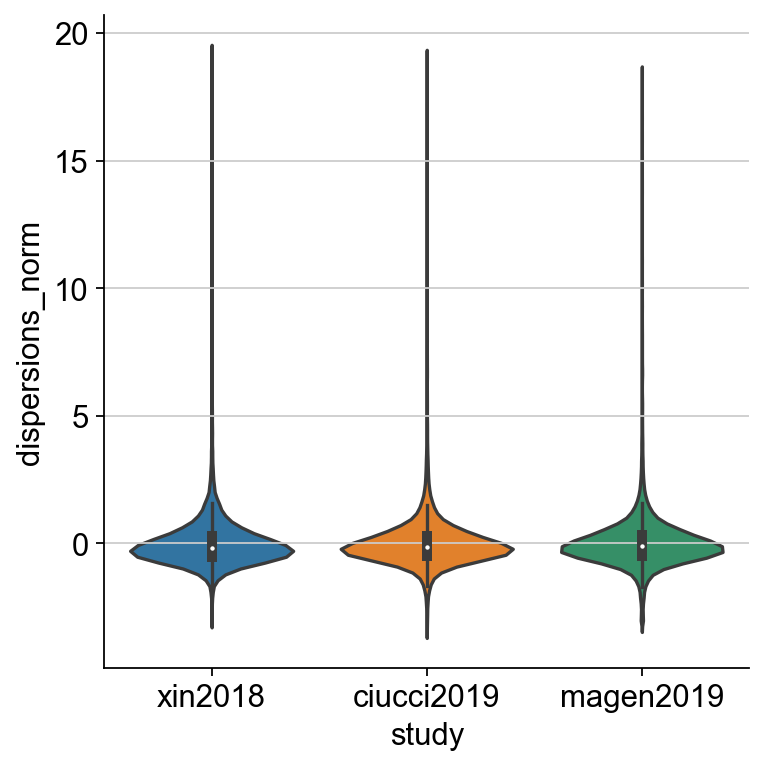

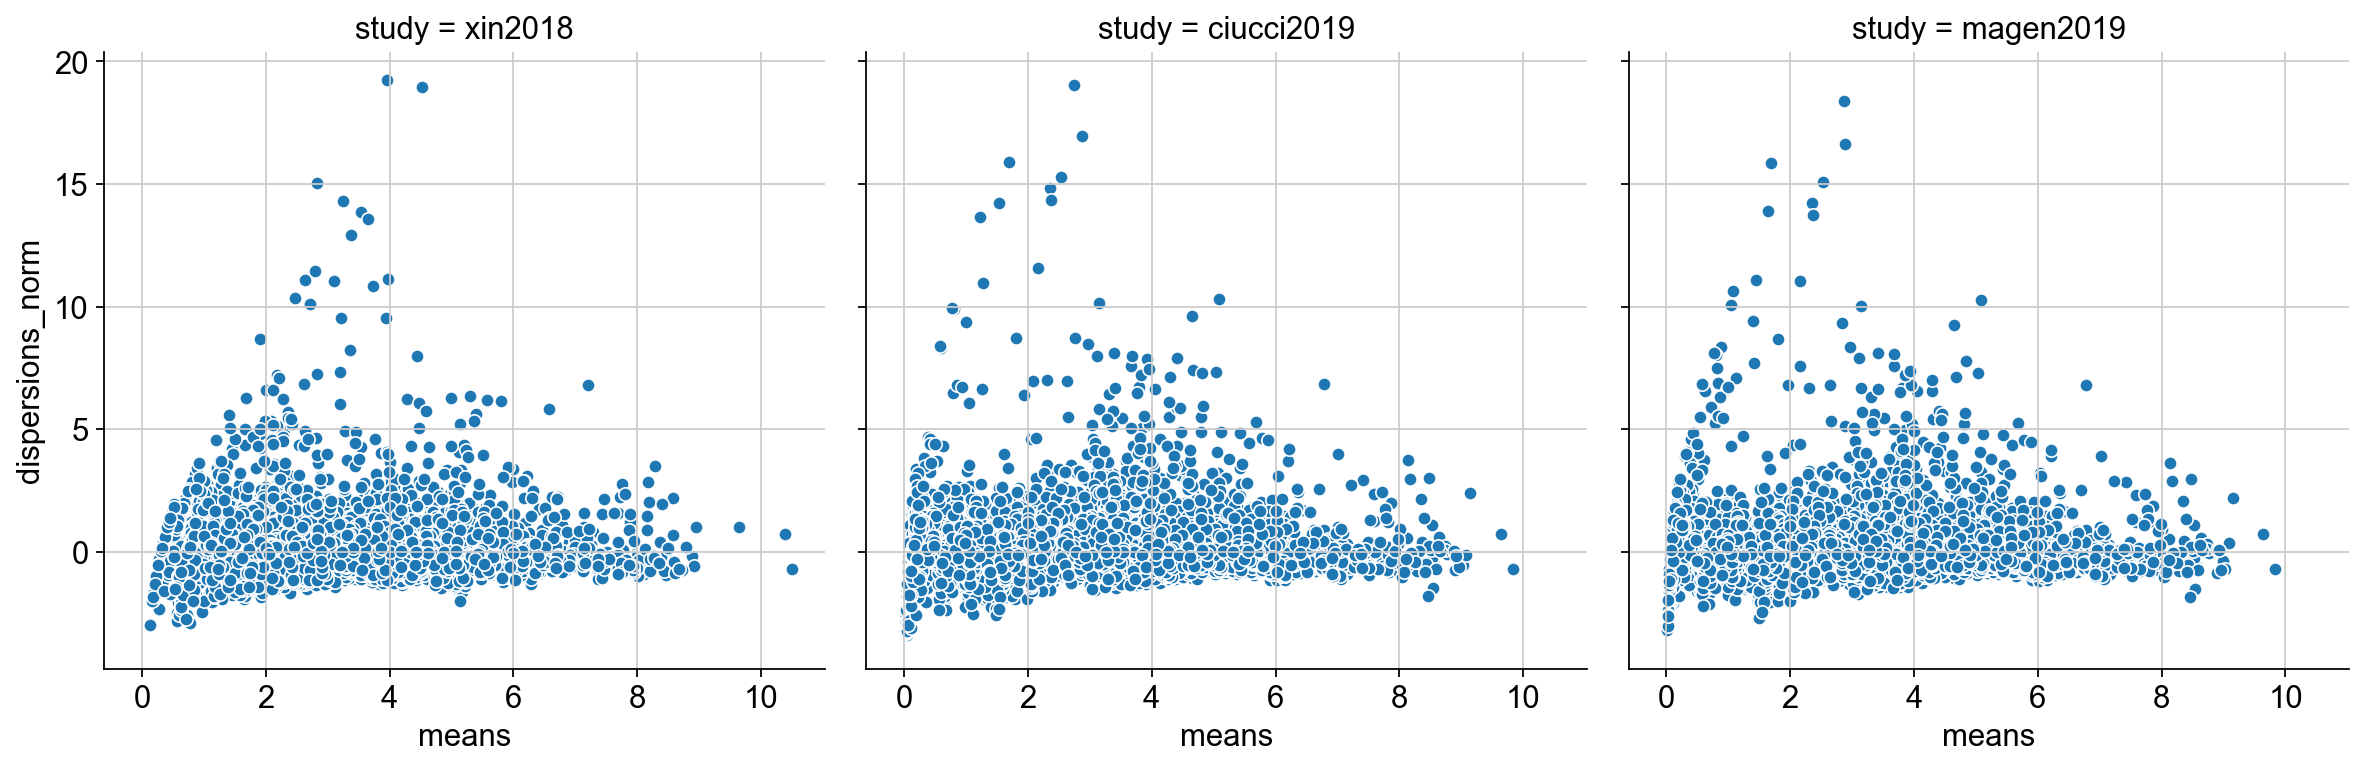

In [30]:
df2 = df[df.highly_variable == True]
df2["dispersion_log"] = np.log2(df2.dispersions_norm)

g = sns.catplot(data = df, x = "study", y = "dispersions_norm", kind = "violin")
g = sns.relplot(data = df, x = "means", y = "dispersions_norm", col = "study")

# normalization using negative binomial distribution normalization method (Hafemeister/Satija 2019)
one can see that mean/var trend is eliminated but normalized variance distribution look very similar

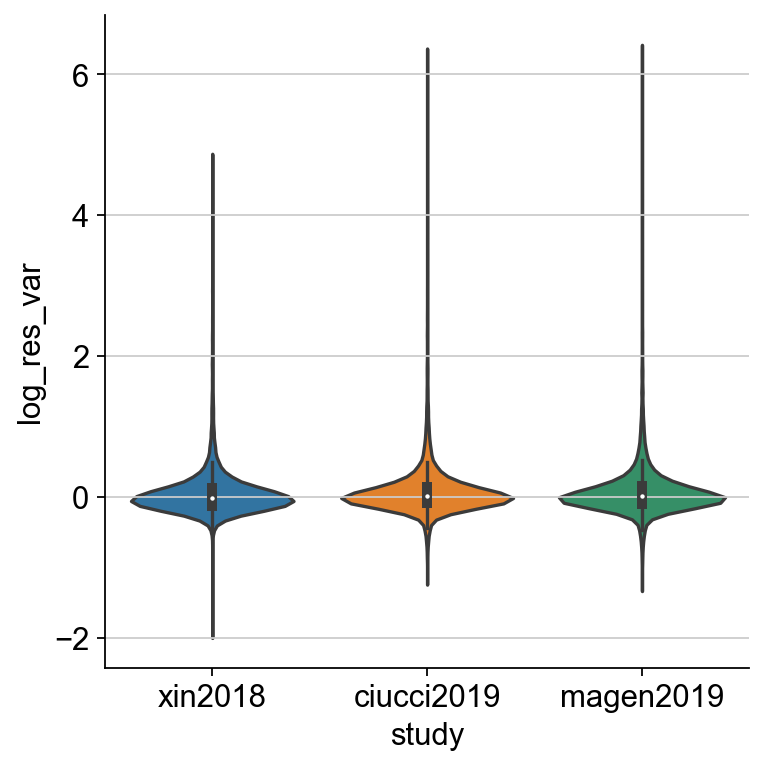

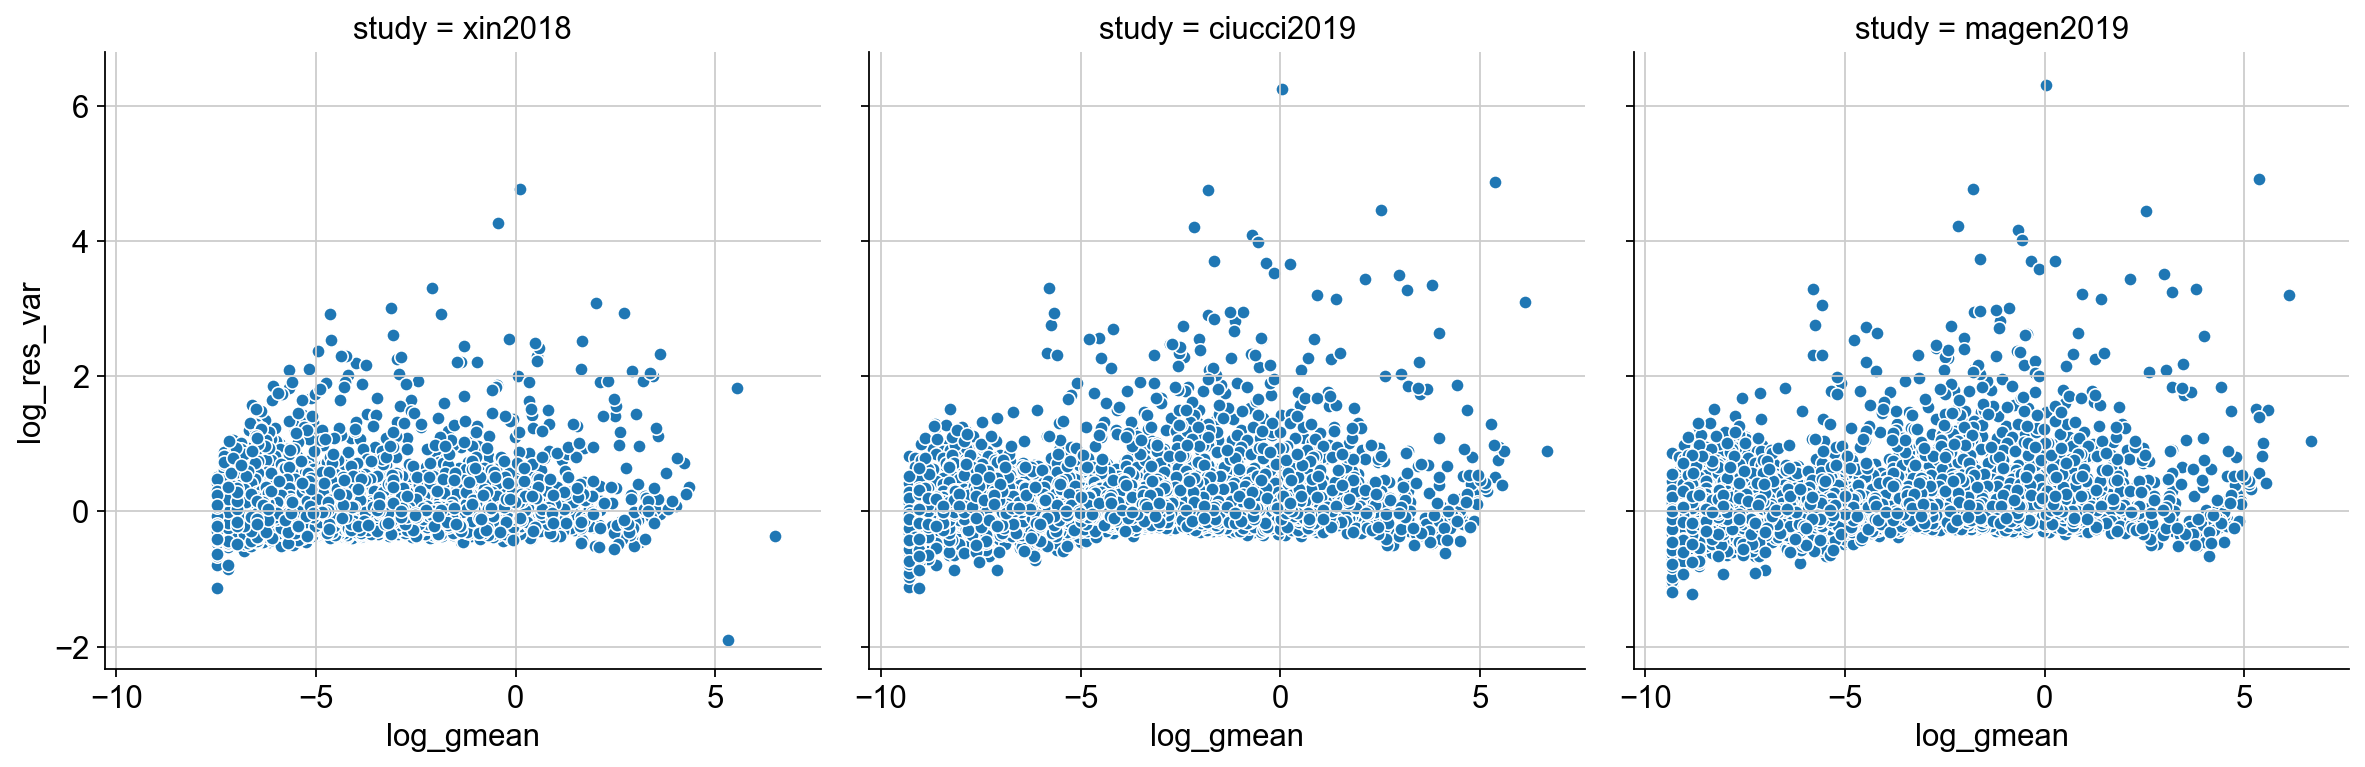

In [31]:
df_seu["log_gmean"] = np.log2(df_seu["sct.gmean"])
df_seu["log_res_var"] = np.log2(df_seu["sct.residual_variance"])
g = sns.catplot(data = df_seu, x = "study", y = "log_res_var", kind = "violin")
# clip outliers!
g.savefig("scseq_variance_distribution.pdf")
g = sns.relplot(data = df_seu, x = "log_gmean", y = "log_res_var", col = "study")

g.savefig("scseq_mean_variance_relation.pdf")